In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [2]:
# Load Customer Demographics data from excel file

cust_demo = pd.read_excel('Raw_data.xlsx', sheet_name='CustomerDemographic')
cust_demo.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [3]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

### Dataset overview

In [4]:
print("Total records in the dataset: {}".format(cust_demo.shape[0]))
print("Total columns in the dataset: {}".format(cust_demo.shape[1]))

Total records in the dataset: 4000
Total columns in the dataset: 13


In [5]:
# select numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
numberic_cols = df_numeric.columns.values
print("The numeric columns are: {}".format(numberic_cols))

# select non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are: {}".format(non_numeric_cols))


The numeric columns are: ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are: ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


## 1. Drop irrelevent columns

In [6]:
# dropping "default" column
cust_demo.drop(labels=('default'), axis=1, inplace=True)

## 2. Missing values check

In [7]:
# Total number of missing values

cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [8]:
# Percentage of missing values

cust_demo.isnull().mean()*100

customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

We can observe that columns last_name, DOB, job_title, job_industry_category and tenure have missing values

### 2.1 Last_name

In [9]:
# Checking for the presence of first name and customer id in records where last name is missing.

df_null_lastname = cust_demo[cust_demo['last_name'].isnull()]
df_null_lastname[['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

Since All customers have a customer_id and First name, all the customers are identifiable. Hence it is okay for to not have a last name. Filling null last names with "None".

In [10]:
cust_demo['last_name'].fillna('None', axis=0, inplace=True)

### 2.2 Date of birth (DOB)

In [11]:
df_null_DOB = cust_demo[cust_demo['DOB'].isnull()]
df_null_DOB

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [12]:
cust_demo['DOB'].isnull().mean()*100

2.175

Since less than 5 % of data has null date of birth. we can remove the records where date of birth is null.

In [13]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index 
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [14]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)

In [15]:
cust_demo['DOB'].isnull().sum()

0

#### Creating Age Column for checking further descripency in data

In [16]:
# convert 'DOB' dtype from string to datetime
cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])

In [17]:
def age(born):
    today = date.today()

    return today.year - born.year + (1 if today.month > born.month else 0)

cust_demo['Age'] = cust_demo['DOB'].apply(age)

/tmp/ipykernel_10342/633987306.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_demo['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

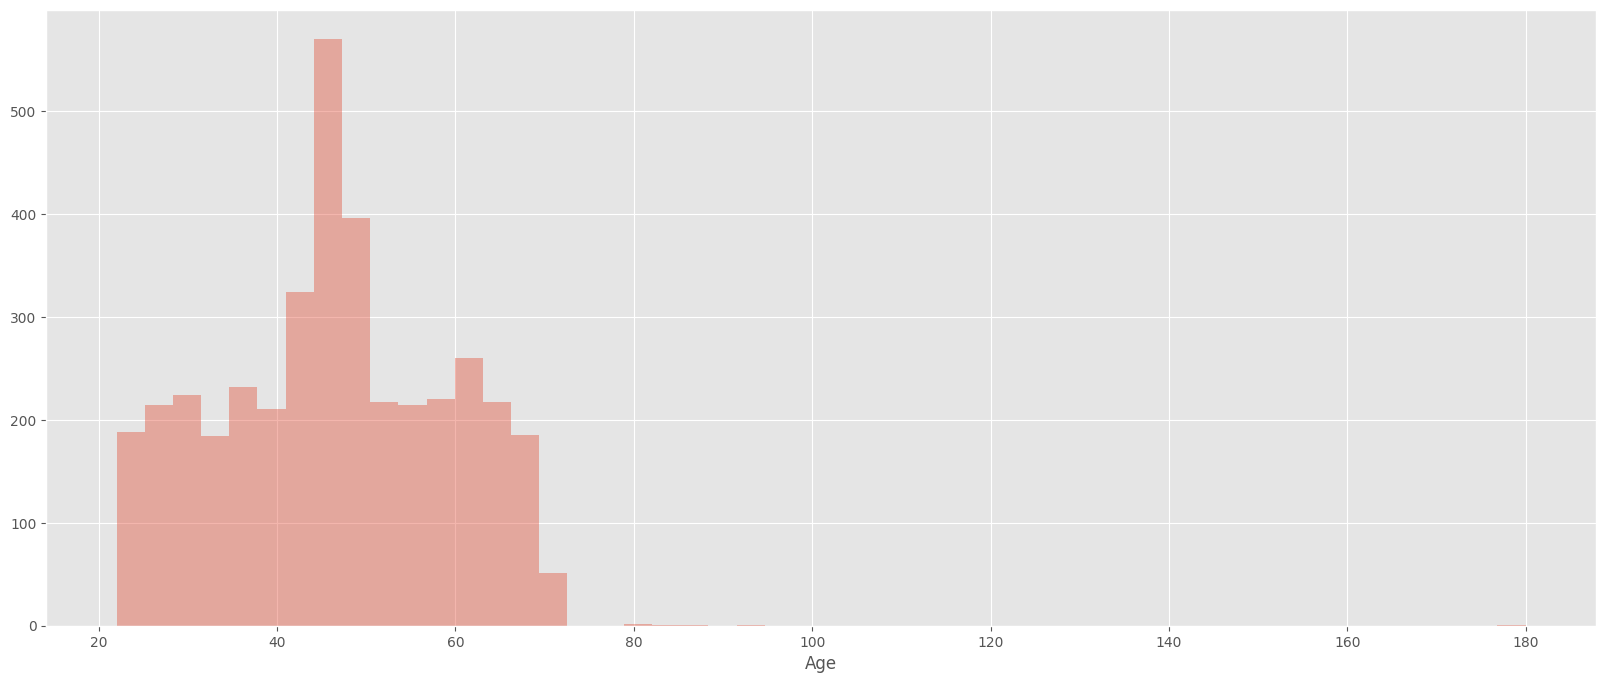

In [18]:
# Viz to find out the Age Distribution
plt.figure(figsize=(20,8))
sns.distplot(cust_demo['Age'], kde=False, bins=50)

In [19]:
cust_demo['Age'].describe()

count    3913.000000
mean       46.462050
std        12.801164
min        22.000000
25%        37.000000
50%        46.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

Here we find there are few customers with an age above 100. Clearly this is an outlier since the 75th percentile of Age is 53.

In [20]:
cust_demo[cust_demo['Age']>100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


In [21]:
# drop outlier record

drop_age_index = cust_demo[cust_demo['Age'] > 100].index
cust_demo.drop(index=drop_age_index, axis=0, inplace=True)

### 2.3 Tenure

In [22]:
cust_demo['tenure'].isnull().sum()

0

When Date of Birth was Null the Tenure was also Null. Hence after removing null DOBs from dataframe , null tenures were also removed.

### 2.4 Job Title

In [23]:
cust_demo['job_title'].isnull().mean()*100

12.704498977505112

Since Percentage of missing Job is 12.7%. We will replace null values with Missing.

In [24]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)

In [25]:
cust_demo['job_title'].isnull().sum()

0

### 2.5 Job Industry Category

In [26]:
cust_demo['job_industry_category'].isnull().mean()*100

16.768916155419223

Since Percentage of missing Job is 16.77%. We will replace null values with Missing.

In [27]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)

In [28]:
cust_demo['job_title'].isnull().sum()

0

## Finally there are no Missing Values in the dataset.

In [29]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [30]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3912 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3912 non-null   int64         
 1   first_name                           3912 non-null   object        
 2   last_name                            3912 non-null   object        
 3   gender                               3912 non-null   object        
 4   past_3_years_bike_related_purchases  3912 non-null   int64         
 5   DOB                                  3912 non-null   datetime64[ns]
 6   job_title                            3912 non-null   object        
 7   job_industry_category                3912 non-null   object        
 8   wealth_segment                       3912 non-null   object        
 9   deceased_indicator                   3912 non-null   object        
 10  owns_car         

### 3. Inconsistency Check in Data

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment', 'deceased_indicator', 'owns_car'

#### 3.1 Gender

In [32]:
cust_demo['gender'].value_counts()

gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [33]:
def replace_inconsistency_gender(gender_type):
    if gender_type == "F":
        return "Female"
    elif gender_type == "M":
        return "Male"
    elif gender_type == "Femal":
        return "Female"
    else:
        return gender_type

cust_demo['gender'] = cust_demo['gender'].apply(replace_inconsistency_gender)

In [34]:
cust_demo['gender'].value_counts()

gender
Female    2039
Male      1873
Name: count, dtype: int64

#### 3.2 Wealth segment

In [36]:
cust_demo['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

#### 3.3 Decreased indicator

In [37]:
cust_demo['deceased_indicator'].value_counts()

deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

#### 3.4 Owns Car

In [38]:
cust_demo['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

### 4. Duplication checks

In [41]:
# Count the number of unique values in the 'customer_id' column
cust_demo['customer_id'].nunique()

3912

In [44]:
cust_drop_id = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Total unique records after drop customer_id(pk) and duplicates: {}".format(cust_drop_id.shape[0]))

Total unique records after drop customer_id(pk) and duplicates: 3912


Since both the numbers are same. There are no duplicate records in the dataset.

### 5. Export cleaned customer Demogerphic dataset to CSV

In [45]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)